In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool, cv

In [45]:
df = pd.read_csv('/Users/pavelbryantsev/Desktop/Python/Courses/Gleb/Projects/Regression with a Tabular Media Campaign Cost Dataset/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [46]:
df.drop(['id'], axis=1, inplace=True)

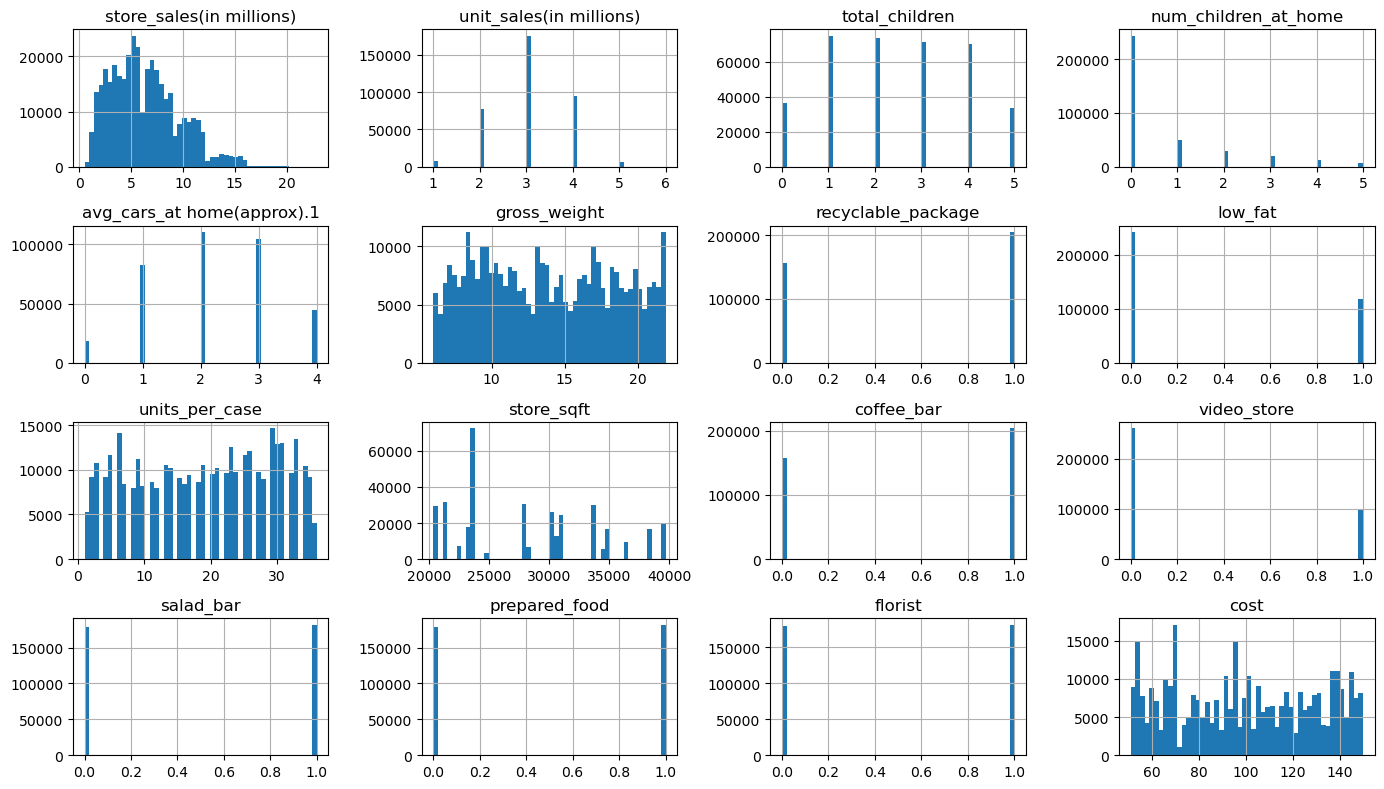

In [5]:
df.hist(bins=50, figsize=(14,8))
plt.tight_layout();

In [6]:
df.isna().mean().sort_values(ascending=False)

store_sales(in millions)      0.0
unit_sales(in millions)       0.0
total_children                0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
gross_weight                  0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_sqft                    0.0
coffee_bar                    0.0
video_store                   0.0
salad_bar                     0.0
prepared_food                 0.0
florist                       0.0
cost                          0.0
dtype: float64

# Spliting the data

In [7]:
df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

In [47]:
X = ['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
y = ['cost']

cat_features = ['recyclable_package', 'low_fat', 'coffee_bar',
                'video_store', 'salad_bar', 'prepared_food',
                'florist', 'unit_sales(in millions)', 'total_children',
                'num_children_at_home', 'avg_cars_at home(approx).1']

for col in cat_features:
    df[col] = df[col].astype('str')

In [48]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_, val = train_test_split(test, test_size=0.25, random_state=42)

In [49]:
train_pool = Pool(train_[X], train_[y], cat_features=cat_features)
test_pool = Pool(val[X], val[y], cat_features=cat_features)

# Fitting the model

In [50]:
params = {'iterations': 1000,
            'learning_rate': 0.1,
            'eval_metric': 'MSLE',
            'loss_function': 'RMSE',
            'random_seed': 42,
            'verbose': 100}

In [51]:
model = CatBoostRegressor(**params)

In [52]:
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.1018399	test: 0.1023914	best: 0.1023914 (0)	total: 69.1ms	remaining: 1m 9s
100:	learn: 0.0944723	test: 0.0956781	best: 0.0956757 (99)	total: 1.97s	remaining: 17.5s
200:	learn: 0.0929327	test: 0.0949134	best: 0.0949134 (200)	total: 3.38s	remaining: 13.4s
300:	learn: 0.0915836	test: 0.0945609	best: 0.0945609 (300)	total: 4.97s	remaining: 11.5s
400:	learn: 0.0904719	test: 0.0944505	best: 0.0944309 (379)	total: 6.62s	remaining: 9.89s
500:	learn: 0.0895166	test: 0.0944116	best: 0.0943879 (479)	total: 8.46s	remaining: 8.43s
600:	learn: 0.0886719	test: 0.0943860	best: 0.0943324 (536)	total: 10.1s	remaining: 6.71s
700:	learn: 0.0878719	test: 0.0944177	best: 0.0943324 (536)	total: 11.8s	remaining: 5.02s
800:	learn: 0.0871658	test: 0.0943732	best: 0.0943324 (536)	total: 13.8s	remaining: 3.43s
900:	learn: 0.0865658	test: 0.0943474	best: 0.0943165 (876)	total: 16.2s	remaining: 1.78s
999:	learn: 0.0858427	test: 0.0943705	best: 0.0943165 (876)	total: 18.8s	remaining: 0us

bestTest = 0.09

In [53]:
np.sqrt(0.09431651057)

0.30710993238578266

In [54]:
mean_absolute_percentage_error(test[y], model.predict(test[X]))

0.276908362137353

# Cross validation

In [46]:
params = {'eval_metric': 'MSLE', 
          'loss_function': 'RMSE', 
          'random_seed': 43, 
          'verbose':100,
          'learning_rate': 0.01}

In [48]:
train_pool = Pool(train[X], train[y], cat_features=cat_features)

In [49]:
cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=100,
    early_stopping_rounds=200
)

Training on fold [0/3]
0:	learn: 15.1010811	test: 15.0774328	best: 15.0774328 (0)	total: 45.8ms	remaining: 45.8s
100:	learn: 0.2550844	test: 0.2532122	best: 0.2532122 (100)	total: 17.5s	remaining: 2m 35s
200:	learn: 0.1049769	test: 0.1049921	best: 0.1049921 (200)	total: 30.6s	remaining: 2m 1s
300:	learn: 0.0951917	test: 0.0957670	best: 0.0957670 (300)	total: 37.9s	remaining: 1m 27s
400:	learn: 0.0953251	test: 0.0961321	best: 0.0957245 (314)	total: 43.7s	remaining: 1m 5s
500:	learn: 0.0955560	test: 0.0964282	best: 0.0957245 (314)	total: 50.2s	remaining: 50s

bestTest = 0.09572454057
bestIteration = 314

Training on fold [1/3]
0:	learn: 15.0958330	test: 15.1033981	best: 15.1033981 (0)	total: 422ms	remaining: 7m 1s
100:	learn: 0.2551679	test: 0.2560796	best: 0.2560796 (100)	total: 22.7s	remaining: 3m 22s
200:	learn: 0.1051422	test: 0.1054617	best: 0.1054617 (200)	total: 37.6s	remaining: 2m 29s
300:	learn: 0.0954739	test: 0.0956278	best: 0.0956278 (300)	total: 47.8s	remaining: 1m 51s
400:	

In [50]:
cv_data.sort_values(by=['test-MSLE-mean']).head(5)

,iterations,test-MSLE-mean,test-MSLE-std,train-MSLE-mean,train-MSLE-std,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
319,319,0.095522,0.000234,0.095444,0.000356,29.521113,0.044262,29.508951,0.040527
323,323,0.095522,0.000244,0.095443,0.000355,29.496281,0.043381,29.483926,0.040533
324,324,0.095524,0.000241,0.095445,0.000360,29.490514,0.043558,29.478123,0.041303
321,321,0.095524,0.000245,0.095446,0.000351,29.508979,0.044229,29.496747,0.039701
320,320,0.095525,0.000232,0.095447,0.000361,29.515235,0.044759,29.503047,0.041197


In [51]:
np.sqrt(0.095522)

0.30906633592159466

# Grid Search

In [53]:
grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
          # 'iterations':[250,320,500,1000],
          'learning_rate':[0.03,0.01,0.1,0.05], 
        #   'l2_leaf_reg':[3,1,5,10,100],
        #   'border_count':[32,5,10,20,50,100,200],
        #   'ctr_border_count':[50,5,10,20,100,200],
        #   'thread_count':4
          }

In [54]:
model = CatBoostRegressor(eval_metric="MSLE", verbose=100)

In [56]:
grid_search_result = model.grid_search(grid, train_pool)

0:	learn: 10.2137862	test: 10.2195772	best: 10.2195772 (0)	total: 25.1ms	remaining: 6.25s
100:	learn: 0.0966764	test: 0.0967424	best: 0.0967424 (100)	total: 5.27s	remaining: 7.78s
200:	learn: 0.0969164	test: 0.0969308	best: 0.0966403 (110)	total: 9.8s	remaining: 2.39s
249:	learn: 0.0965439	test: 0.0965608	best: 0.0965608 (249)	total: 12s	remaining: 0us

bestTest = 0.09656076839
bestIteration = 249

0:	loss: 0.0965608	best: 0.0965608 (0)	total: 12.1s	remaining: 32m 2s
0:	learn: 15.0948105	test: 15.1013637	best: 15.1013637 (0)	total: 46.6ms	remaining: 11.6s
100:	learn: 0.2557245	test: 0.2563254	best: 0.2563254 (100)	total: 6.58s	remaining: 9.7s
200:	learn: 0.1060324	test: 0.1061979	best: 0.1061979 (200)	total: 10.3s	remaining: 2.51s
249:	learn: 0.0982159	test: 0.0983184	best: 0.0983184 (249)	total: 12.3s	remaining: 0us

bestTest = 0.09831841124
bestIteration = 249

1:	loss: 0.0983184	best: 0.0965608 (0)	total: 24.4s	remaining: 32m 6s
0:	learn: 4.8057673	test: 4.8099127	best: 4.8099127 (0

In [10]:
def calc_test_quality(**kwargs):
    model = CatBoostRegressor(**kwargs, random_seed=42)
    model.fit(train_pool, eval_set=test_pool)
    y_pred = model.predict(val[X])
    return mean_absolute_error(val[y], model.predict(val[X]))

In [58]:
calc_test_quality(**grid_search_result['params']), grid_search_result['params']

0:	learn: 29.8448684	test: 29.9259823	best: 29.9259823 (0)	total: 81.2ms	remaining: 1m 21s
1:	learn: 29.7730885	test: 29.8541266	best: 29.8541266 (1)	total: 125ms	remaining: 1m 2s
2:	learn: 29.7068799	test: 29.7875062	best: 29.7875062 (2)	total: 198ms	remaining: 1m 5s
3:	learn: 29.6389963	test: 29.7207854	best: 29.7207854 (3)	total: 257ms	remaining: 1m 3s
4:	learn: 29.5742407	test: 29.6558831	best: 29.6558831 (4)	total: 332ms	remaining: 1m 6s
5:	learn: 29.5143364	test: 29.5954156	best: 29.5954156 (5)	total: 426ms	remaining: 1m 10s
6:	learn: 29.4604441	test: 29.5423009	best: 29.5423009 (6)	total: 508ms	remaining: 1m 12s
7:	learn: 29.4147639	test: 29.4979126	best: 29.4979126 (7)	total: 614ms	remaining: 1m 16s
8:	learn: 29.3658633	test: 29.4477484	best: 29.4477484 (8)	total: 702ms	remaining: 1m 17s
9:	learn: 29.3202866	test: 29.4021998	best: 29.4021998 (9)	total: 797ms	remaining: 1m 18s
10:	learn: 29.2822640	test: 29.3650181	best: 29.3650181 (10)	total: 889ms	remaining: 1m 19s
11:	learn: 

(23.88401130353685, {'depth': 10, 'iterations': 1000, 'learning_rate': 0.05})

(23.88401130353685, {'depth': 10, 'iterations': 1000, 'learning_rate': 0.05})

# Code for Tuning CatBoost Hyperparameters with Optuna

https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/

In [11]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        # "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(train_pool)
    predictions = model.predict(test[X])
    rmse = mean_squared_error(test[y], predictions, squared=False)
    return rmse

In [12]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-10-27 16:23:05,286] A new study created in memory with name: no-name-b867bb56-9a8e-4ba9-9105-7515aeac1177
[W 2023-10-27 16:23:05,290] Trial 0 failed with parameters: {'learning_rate': 0.005088775229259393, 'depth': 9} because of the following error: NameError("name 'train_pool' is not defined").
Traceback (most recent call last):
  File "/Users/pavelbryantsev/miniforge3/envs/dscience/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/sg/1c3btq_91ps4pmk0y0809zmw0000gn/T/ipykernel_72130/1391263327.py", line 14, in objective
    model.fit(train_pool)
NameError: name 'train_pool' is not defined
[W 2023-10-27 16:23:05,292] Trial 0 failed with value None.


NameError: name 'train_pool' is not defined

In [66]:
calc_test_quality(**study.best_params), study.best_params

0:	learn: 29.7775637	test: 29.8568901	best: 29.8568901 (0)	total: 53.7ms	remaining: 53.6s
1:	learn: 29.6458690	test: 29.7262714	best: 29.7262714 (1)	total: 149ms	remaining: 1m 14s
2:	learn: 29.5366251	test: 29.6177419	best: 29.6177419 (2)	total: 184ms	remaining: 1m 1s
3:	learn: 29.4458973	test: 29.5259381	best: 29.5259381 (3)	total: 243ms	remaining: 1m
4:	learn: 29.3732538	test: 29.4517044	best: 29.4517044 (4)	total: 298ms	remaining: 59.4s
5:	learn: 29.2947916	test: 29.3719416	best: 29.3719416 (5)	total: 358ms	remaining: 59.3s
6:	learn: 29.2359521	test: 29.3120769	best: 29.3120769 (6)	total: 410ms	remaining: 58.1s
7:	learn: 29.1829428	test: 29.2551250	best: 29.2551250 (7)	total: 453ms	remaining: 56.2s
8:	learn: 29.1365527	test: 29.2085669	best: 29.2085669 (8)	total: 501ms	remaining: 55.1s
9:	learn: 29.0951482	test: 29.1670028	best: 29.1670028 (9)	total: 551ms	remaining: 54.5s
10:	learn: 29.0598331	test: 29.1294307	best: 29.1294307 (10)	total: 599ms	remaining: 53.8s
11:	learn: 29.029459

(23.889629897383337, {'learning_rate': 0.0946155575469462, 'depth': 9})

(23.889629897383337, {'learning_rate': 0.0946155575469462, 'depth': 9})

# Fitting using best params

In [13]:
params = {'iterations': 1000,
            'learning_rate': 0.09,
            'depth': 9,
            'eval_metric': 'MSLE',
            'loss_function': 'RMSE',
            'random_seed': 42,
            'verbose': 100}

Because we performed all experimants, we are ready to train our model using all data 

In [14]:
train_all_data = Pool(train[X], train[y], cat_features=cat_features)

In [15]:
model = CatBoostRegressor(**params)

Don't use eval_set when you fit the model using best params (You have found during CV or GridSearch)

In [16]:
model.fit(train_all_data)

0:	learn: 0.1015767	total: 123ms	remaining: 2m 3s
100:	learn: 0.0916559	total: 6.34s	remaining: 56.4s
200:	learn: 0.0898776	total: 13.9s	remaining: 55.4s
300:	learn: 0.0886215	total: 20.6s	remaining: 47.9s
400:	learn: 0.0876827	total: 27.1s	remaining: 40.5s
500:	learn: 0.0868236	total: 34.5s	remaining: 34.4s
600:	learn: 0.0859363	total: 41.3s	remaining: 27.4s
700:	learn: 0.0852607	total: 47.8s	remaining: 20.4s
800:	learn: 0.0845911	total: 54.3s	remaining: 13.5s
900:	learn: 0.0839699	total: 1m	remaining: 6.67s
999:	learn: 0.0833670	total: 1m 7s	remaining: 0us


In [70]:
np.sqrt(0.0905492)

0.300913941185848

In [17]:
mean_absolute_percentage_error(test[y], model.predict(test[X]))

0.275567467275764

# Kaggle submission

In [72]:
kaggle_sub = pd.read_csv('/Users/pavelbryantsev/Desktop/Python/Courses/Gleb/Projects/Regression with a Tabular Media Campaign Cost Dataset/test.csv')

In [74]:
for col in cat_features:
    kaggle_sub[col] = kaggle_sub[col].astype('str')

In [75]:
kaggle_sub['cost'] = model.predict(kaggle_sub[X])
kaggle_sub[['id', 'cost']].to_csv('submission.csv', index=False)

# Using LightGBM

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv('/Users/pavelbryantsev/Desktop/Python/Courses/Gleb/Projects/Regression with a Tabular Media Campaign Cost Dataset/train.csv')

In [14]:
X = ['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
y = ['cost']

In [16]:
train, test = train_test_split(data,test_size=0.20,random_state=42)
train_, val = train_test_split(train,test_size=0.25,random_state=42)

In [28]:
train_total = lgb.Dataset(train[X], label=train[y])
val_data = lgb.Dataset(val[X], label=val[y])
test_data = lgb.Dataset(test[X], label=test[y])
train_data = lgb.Dataset(train_[X], label=train_[y])

In [29]:
params = {
    "objective": "regression",
    "metric": "rmse",  
    "num_leaves": 31,  
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

lgb_model = lgb.train(params, train_data, num_boost_round=1000,
                      valid_sets=[val_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 216201, number of used features: 15
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 99.638771


In [33]:
lgb_model.refit(train[X], train[y])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 288268, number of used features: 15


In [37]:
para = lgb.LGBMModel().get_params()

# print the parameters and their default values
for key, value in para.items():
    print(key, ':', value)

boosting_type : gbdt
class_weight : None
colsample_bytree : 1.0
importance_type : split
learning_rate : 0.1
max_depth : -1
min_child_samples : 20
min_child_weight : 0.001
min_split_gain : 0.0
n_estimators : 100
n_jobs : None
num_leaves : 31
objective : None
random_state : None
reg_alpha : 0.0
reg_lambda : 0.0
subsample : 1.0
subsample_for_bin : 200000
subsample_freq : 0


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

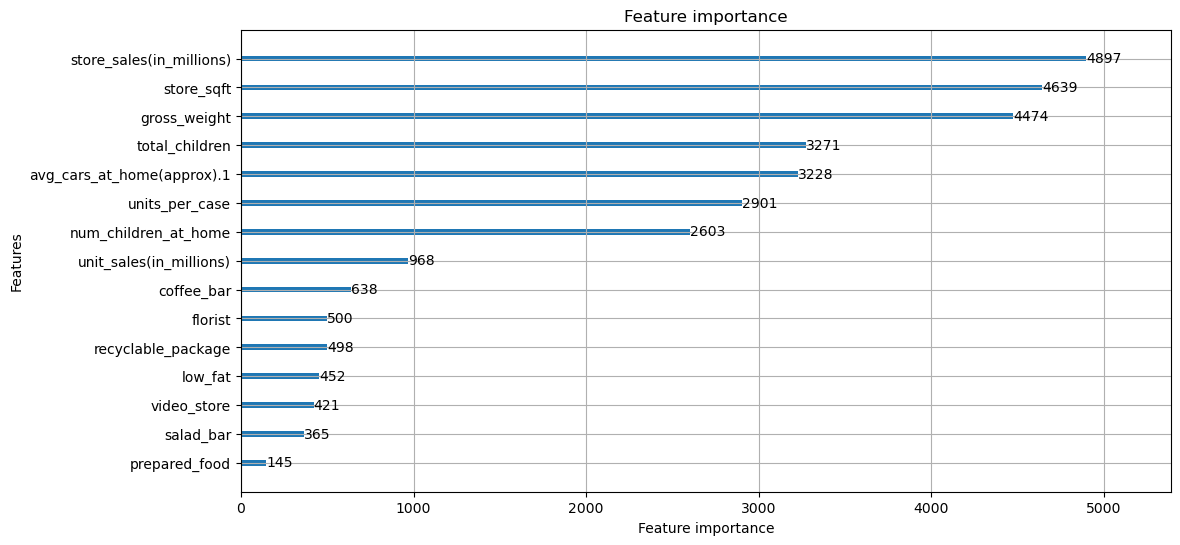

In [40]:
lgb.plot_importance(lgb_model, figsize=(12, 6))

In [36]:
y_pred = lgb_model.predict(test[X])

rmse = mean_squared_error(test[y], y_pred, squared=False)
mape = mean_absolute_percentage_error(test[y], y_pred)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 28.20913282986701
MAPE: 0.2781081666122145


RMSE: 28.182768294482408
MAPE: 0.2779133422510403

# Other code 

In [20]:
lgb_model = lgb.LGBMRegressor(
    # categorical_feature= ['recyclable_package', 'low_fat', 'coffee_bar',
                # 'video_store', 'salad_bar', 'prepared_food',
                # 'florist', 'unit_sales(in millions)', 'total_children',
                # 'num_children_at_home', 'avg_cars_at home(approx).1'],
    task = 'predict',
    application = 'regression',
    objective = 'root_mean_squared_error',
    boosting_type="gbdt",
    num_iterations = 2500,
    learning_rate = 0.05,
    num_leaves=15,
    tree_learner='feature',
    max_depth =10,
    min_data_in_leaf=7,
    bagging_fraction = 1,
    bagging_freq = 100,
    reg_sqrt='True',
    metric ='rmse',
    feature_fraction = 0.6,
    random_state=42)

lgb_model.fit(train[X], train[y])


preds_lgb_model = lgb_model.predict(test[X])
rmse_lgb = np.sqrt(mean_squared_error(test[y], preds_lgb_model))
print(" RMSE: %f" % (rmse_lgb ))

/Users/pavelbryantsev/miniforge3/envs/dscience/lib/python3.10/site-packages/lightgbm/sklearn.py:644: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'objective' argument")
/Users/pavelbryantsev/miniforge3/envs/dscience/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: fea

/Users/pavelbryantsev/miniforge3/envs/dscience/lib/python3.10/site-packages/lightgbm/sklearn.py:644: UserWarning: Found 'application' in params. Will use it instead of 'objective' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'objective' argument")


[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
 RMSE: 28.356505


# Cross validation

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
with warnings.catch_warnings():
    #just to supress warning
    warnings.filterwarnings("ignore")
    # Cross Validation score
    scores = cross_val_score(lgb_model, train[X], train[y], scoring = "neg_mean_squared_error", cv =10, verbose=1)
    rmse_scores = np.sqrt(-scores)
    print(rmse_scores.mean())

[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: fea

# Grid Search

In [ ]:
# parameters = {
#      'task' : ['predict'],
#      'boosting': ['gbdt' ],
#      'objective': ['root_mean_squared_error'],
#      'num_iterations': [  1500, 2000,5000  ],
#      'learning_rate':[  0.05, 0.005 ],
#     'num_leaves':[ 7, 15, 31  ],
#     'max_depth' :[ 10,15,25],
#     'min_data_in_leaf':[15,25 ],
#    'feature_fraction': [ 0.6, 0.8,  0.9],
#      'bagging_fraction': [  0.6, 0.8 ],
#      'bagging_freq': [   100, 200, 400  ],
     
# }

# gsearch_lgb = GridSearchCV(lgb_model, param_grid = parameters, n_jobs=6, verbose=10)
# gsearch_lgb.fit(train[X], train[y])
 

# print('best params')
# print (gsearch_lgb.best_params_)
# preds_lgb_model = gsearch_lgb.predict(test[X])
# rmse_lgb = np.sqrt(mean_squared_error(test[y], preds_lgb_model))
# print(" RMSE: %f" % (rmse_lgb ))

# Mining best params